<a href="https://colab.research.google.com/github/MmeGGy/MOWI/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Якщо хочете тестовий приклад введіть 1, якщо основний введіть 2
2
 Введіть межі інтегралу 
 a = 1

 Межа b повинна бути більша ніж а 
 b = 2


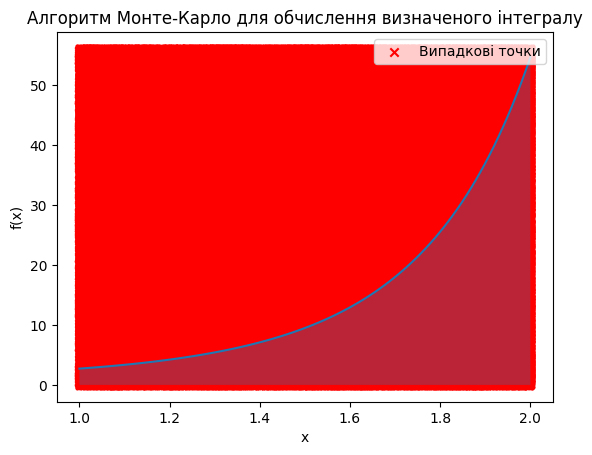

Значення інтеграла за допомогою методу Монте-Карла: 14.976976
Точне значення інтеграла 14.98997601960005
Абсолютна похибка: 0.013000019600049484
Відносна похибка: 0.08672475248160097
Оцінка похибки: 5.6e-05


In [2]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Функція
def f(m, x):
    if m == 1:
        return pow(2, x) # Test function
    else:
        return np.exp(pow(x, 2)) # Main function

# Значення інтегралу
def integral(a, b, m):
    if m == 1:
        return (np.power(2, b)/math.log(2))-(np.power(2, a)/math.log(2)) # Тестова функція
    else:
        return 14.98997601960005 # Основна функція, важко записати це тому тільки число
# Генератор випадкового числа
def rand_point(a, b, N, y_max):
  x = np.random.uniform(a, b, N)
  y = np.random.uniform(0, y_max, N)
  return x, y

def monte_carlo(a, b, N, m, y_max):
  x, y = rand_point(a, b, N, y_max)
  count = 0
  for i in range(N):
    if y[i] <= f(m, x[i]):
      count += 1
  func = (y_max * count) / N
  plt.scatter(x, y, c='red', marker='x', label='Випадкові точки')
  plt.fill_between(np.linspace(a, b, 100), f(m, np.linspace(a, b, 100)), where=(np.linspace(a, b, 100) >= a) & (np.linspace(a, b, 100) <= b), alpha=0.3)
  plt.plot(np.linspace(a, b, 100), f(m, np.linspace(a, b, 100)))
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title('Алгоритм Монте-Карло для обчислення визначеного інтегралу')
  plt.legend()
  plt.show()
  return func

# Межі інтегралу і кількість вибірок
N = 1000000

m = int(input(" Якщо хочете тестовий приклад введіть 1, якщо основний введіть 2\n"))
while m != 1 and m != 2:
    m = int(input(" При виборі прикладу була помилка, введіть ваш вибір ще раз\n"))
a = float(input(" Введіть межі інтегралу \n a = "))
b = float(input("\n Межа b повинна бути більша ніж а \n b = "))
while b < a:
    b = float(input(" Введена межа b не правильна, введіть її заново\n"))

y_max = int(f(m, b)) + 2
res = monte_carlo(a, b, N, m, y_max)
ab_p = np.abs(integral(a, b, m) - res)
v_p = (ab_p / integral(a, b, m)) * 100
o_p = ((b-a)*y_max) / N
print('Значення інтеграла за допомогою методу Монте-Карла:', res)
print('Точне значення інтеграла', integral(a, b, m))
print('Абсолютна похибка:', ab_p)
print('Відносна похибка:', v_p)
print('Оцінка похибки:', o_p)